<a href="https://colab.research.google.com/github/mohamed7456/ML-Course-Assignments/blob/main/notebooks/01_knn_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report

# **Dataset**

In [ ]:
# Iris Dataset
iris = datasets.load_iris()
print(type(iris))

iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df

<class 'sklearn.utils._bunch.Bunch'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Extract Features and Target
X = iris_df.drop('target', axis=1)
y = iris_df['target']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
# Scale on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Apply PCA on training data
# PCA is used for dimensionality reduction of features
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

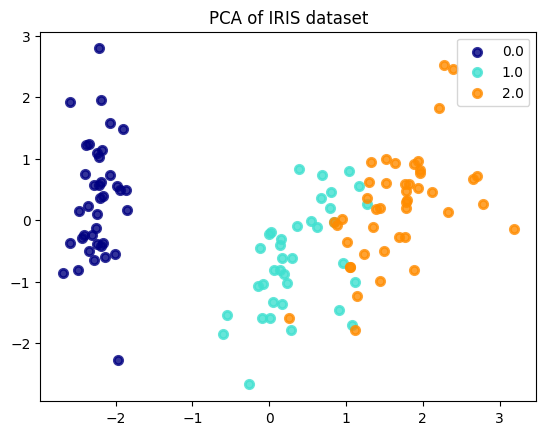

In [ ]:
# Plot PCA Result
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, target_name in zip(colors, np.unique(y)):
    plt.scatter(X_train_pca[y_train == target_name, 0],
                X_train_pca[y_train == target_name, 1],
                color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()

In [ ]:
# check the sizes of the training and test sets
print("Training set size:", X_train_pca.shape[0])
print("Test set size:", X_test_pca.shape[0])

Training set size: 120
Test set size: 30


# **KNN Implementation**

In [ ]:
# function to calculate euclidean distance between two points
def ecu_distance(p1, p2):
  return np.sqrt(np.sum((p1 - p2)**2))

In [ ]:
# Function to compute distances from all training samples to a single test point
def distances(x_train, x_test_point):
    distances = []
    for row in range(len(x_train)):
        current_train_point = x_train[row]
        current_distance = ecu_distance(current_train_point, x_test_point)
        distances.append(current_distance)

    distances_df = pd.DataFrame(data=distances, columns=['dist'], index=range(len(x_train)))
    return distances_df

In [ ]:
# function to find the K nearest neighbors based on calculated distances
def nearest_neighbors(distance_point, K):
    df_nearest = distance_point.sort_values(by=['dist'], axis=0)
    df_nearest = df_nearest[:K]
    return df_nearest

In [ ]:
# function to perform majority voting among the K nearest neighbors
def voting(df_nearest, y_train):
    counter_vote = Counter(y_train[df_nearest.index])

    y_pred = counter_vote.most_common()[0][0]

    return y_pred

In [ ]:
# Main KNN Function
def KNN(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distance_point = distances(X_train, test_point)
        neighbors = nearest_neighbors(distance_point, k)
        predicted_class = voting(neighbors, y_train)
        y_pred.append(predicted_class)
    return y_pred

# **Testing the Implementation and Comparing to Built-in KNN**

In [ ]:
def print_classification_report(y_true, y_pred, model_name='Model', class_names=None):
    print(f"\n Classification Report - {model_name}")
    print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names=None, model_name="KNN"):
    cm = confusion_matrix(y_true, y_pred)
    if class_names is None:
        class_names = sorted(list(set(y_true)))

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_decision_boundary_comparison(X_train, y_train, X_test, y_test, custom_func, sklearn_model, k):
    h = .02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    Z_custom = custom_func(X_train, y_train, grid_points, k)
    Z_custom = np.array(Z_custom).reshape(xx.shape)

    Z_sklearn = sklearn_model.predict(grid_points)
    Z_sklearn = Z_sklearn.reshape(xx.shape)

    plt.figure(figsize=(14, 6))
    # Custom KNN
    plt.subplot(1, 2, 1)
    plt.pcolormesh(xx, yy, Z_custom, cmap=cmap_light)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title("Custom KNN Decision Boundary")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Sklearn KNN
    plt.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, Z_sklearn, cmap=cmap_light)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title("Sklearn KNN Decision Boundary")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.tight_layout()
    plt.show()

## K = 3

In [ ]:
# Custom KNN prediction
y_pred_custom = KNN(X_train_pca, y_train, X_test_pca, k=3)

# Sklearn KNN prediction
knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train_pca, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test_pca)

In [ ]:
print_classification_report(y_test, y_pred_custom, model_name='Custom KNN', class_names=iris.target_names)
print_classification_report(y_test, y_pred_sklearn, model_name='Sklearn KNN', class_names=iris.target_names)


 Classification Report - Custom KNN
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.85      0.92        13
   virginica       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30


 Classification Report - Sklearn KNN
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.85      0.92        13
   virginica       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30



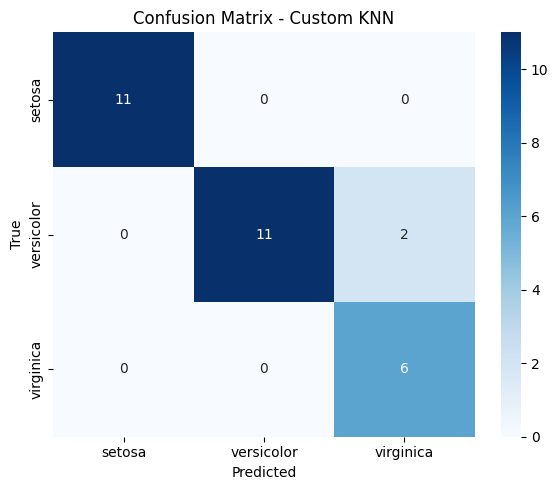

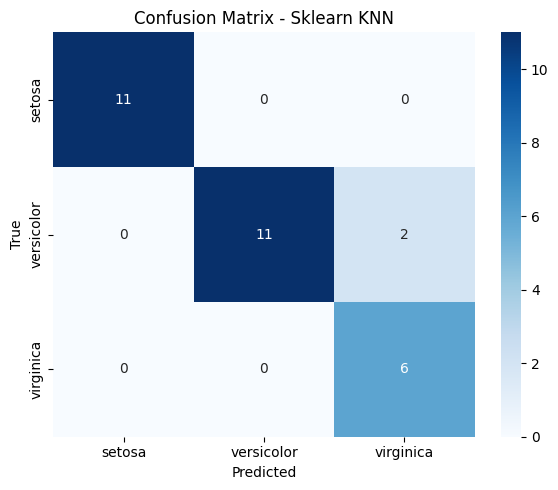

In [ ]:
plot_confusion_matrix(y_test, y_pred_custom, class_names=iris.target_names, model_name='Custom KNN')
plot_confusion_matrix(y_test, y_pred_sklearn, class_names=iris.target_names, model_name='Sklearn KNN')

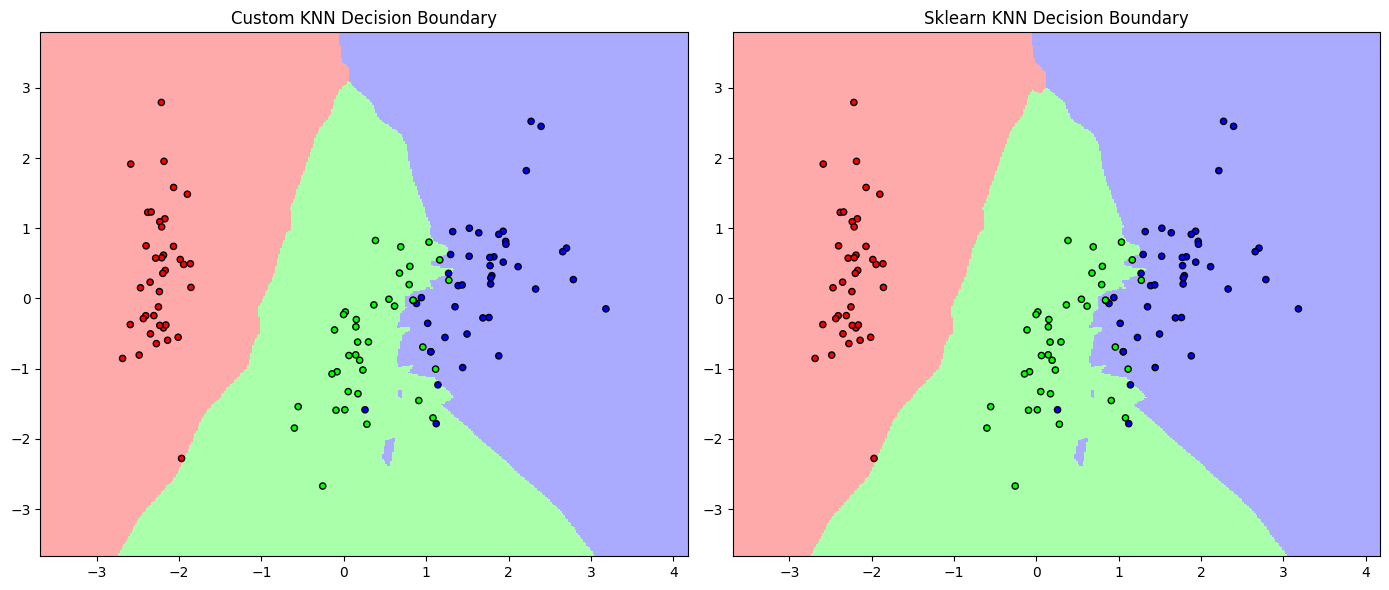

In [ ]:
plot_decision_boundary_comparison(X_train_pca, y_train, X_test_pca, y_test, KNN, knn_sklearn, k=3)

## K = 5

In [ ]:
# Custom KNN prediction
y_pred_custom = KNN(X_train_pca, y_train, X_test_pca, k=5)

# Sklearn KNN prediction
knn_sklearn = KNeighborsClassifier(n_neighbors=5)
knn_sklearn.fit(X_train_pca, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test_pca)

In [ ]:
print_classification_report(y_test, y_pred_custom, model_name='Custom KNN', class_names=iris.target_names)
print_classification_report(y_test, y_pred_sklearn, model_name='Sklearn KNN', class_names=iris.target_names)


 Classification Report - Custom KNN
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.85      0.92        13
   virginica       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30


 Classification Report - Sklearn KNN
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.85      0.92        13
   virginica       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30



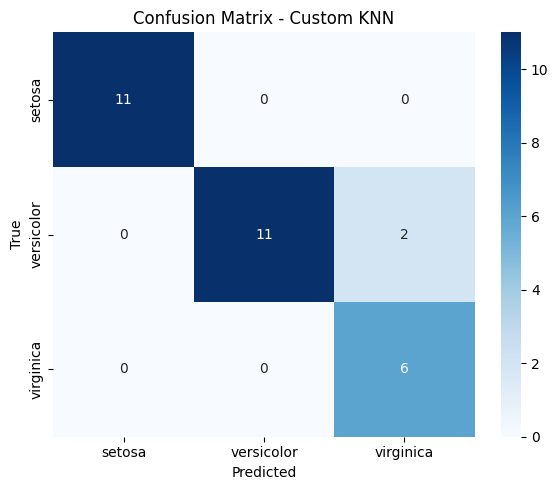

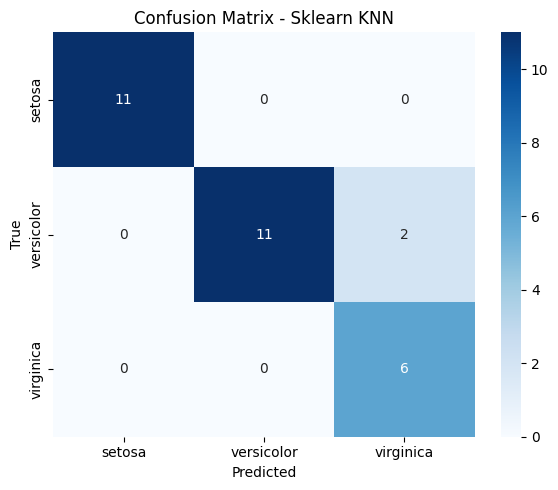

In [ ]:
plot_confusion_matrix(y_test, y_pred_custom, class_names=iris.target_names, model_name='Custom KNN')
plot_confusion_matrix(y_test, y_pred_sklearn, class_names=iris.target_names, model_name='Sklearn KNN')

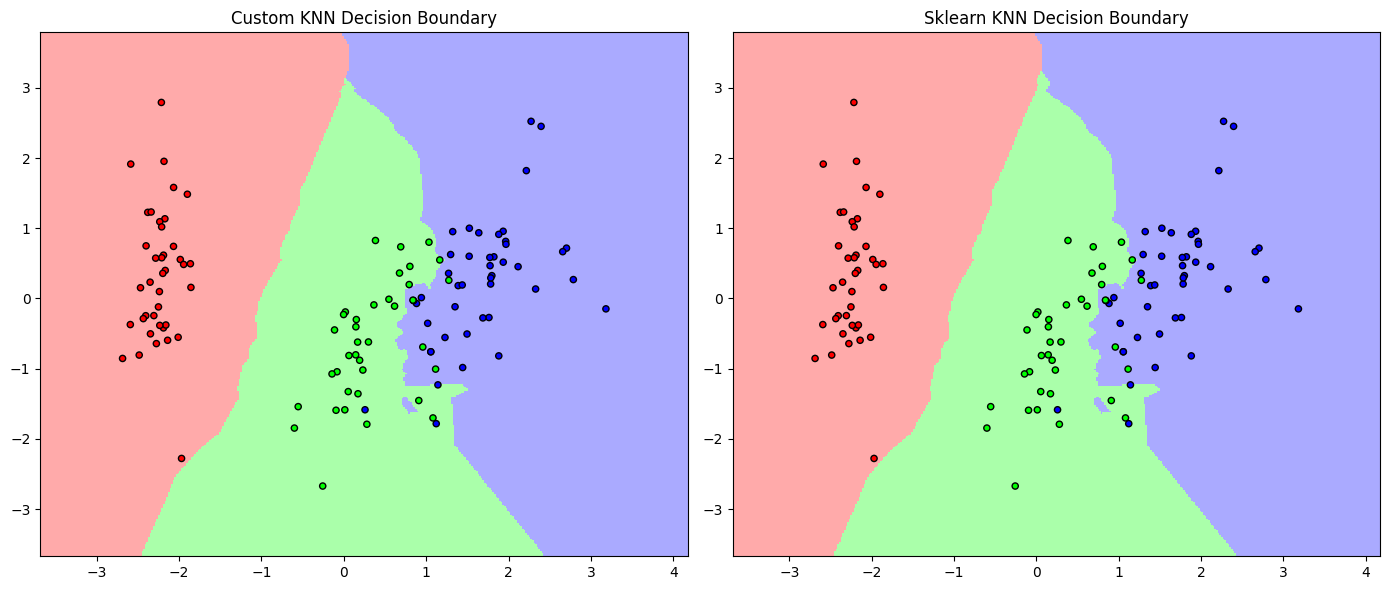

In [ ]:
plot_decision_boundary_comparison(X_train_pca, y_train, X_test_pca, y_test, KNN, knn_sklearn, k=5)

## K = 7

In [ ]:
# Custom KNN prediction
y_pred_custom = KNN(X_train_pca, y_train, X_test_pca, k=7)

# Sklearn KNN prediction
knn_sklearn = KNeighborsClassifier(n_neighbors=7)
knn_sklearn.fit(X_train_pca, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test_pca)

In [ ]:
print_classification_report(y_test, y_pred_custom, model_name='Custom KNN', class_names=iris.target_names)
print_classification_report(y_test, y_pred_sklearn, model_name='Sklearn KNN', class_names=iris.target_names)


 Classification Report - Custom KNN
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.85      0.92        13
   virginica       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30


 Classification Report - Sklearn KNN
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.85      0.92        13
   virginica       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30



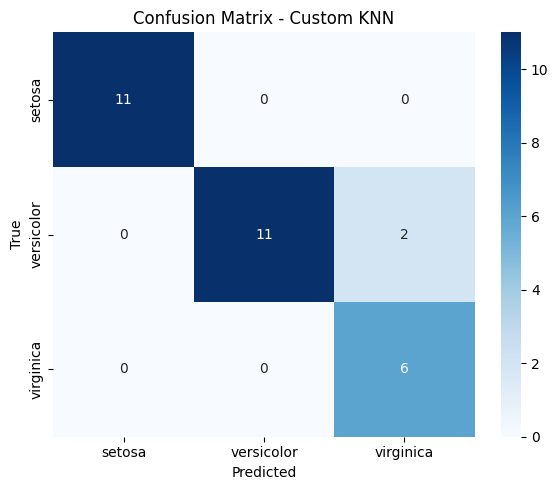

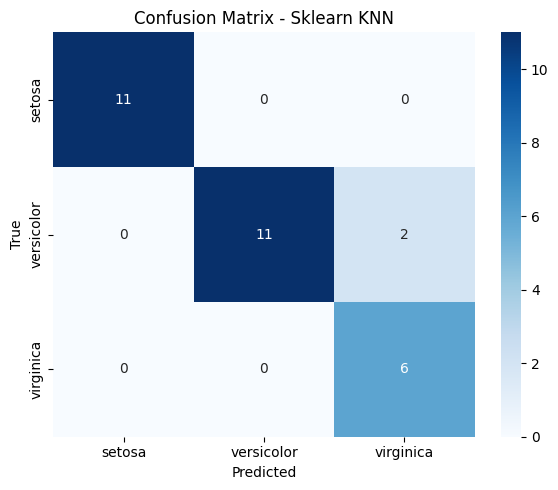

In [ ]:
plot_confusion_matrix(y_test, y_pred_custom, class_names=iris.target_names, model_name='Custom KNN')
plot_confusion_matrix(y_test, y_pred_sklearn, class_names=iris.target_names, model_name='Sklearn KNN')

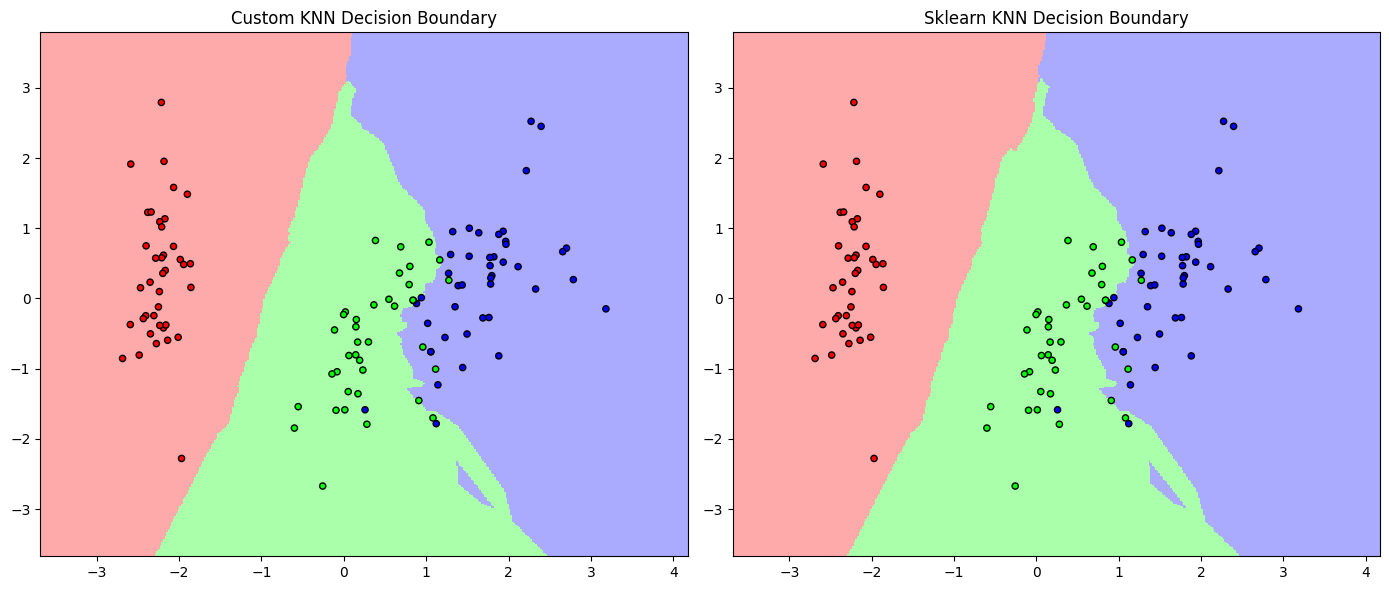

In [ ]:
plot_decision_boundary_comparison(X_train_pca, y_train, X_test_pca, y_test, KNN, knn_sklearn, k=7)

## K = 15

In [ ]:
# Custom KNN prediction
y_pred_custom = KNN(X_train_pca, y_train, X_test_pca, k=15)

# Sklearn KNN prediction
knn_sklearn = KNeighborsClassifier(n_neighbors=15)
knn_sklearn.fit(X_train_pca, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test_pca)

In [ ]:
print_classification_report(y_test, y_pred_custom, model_name='Custom KNN', class_names=iris.target_names)
print_classification_report(y_test, y_pred_sklearn, model_name='Sklearn KNN', class_names=iris.target_names)


 Classification Report - Custom KNN
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.85      0.92        13
   virginica       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30


 Classification Report - Sklearn KNN
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.85      0.92        13
   virginica       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30



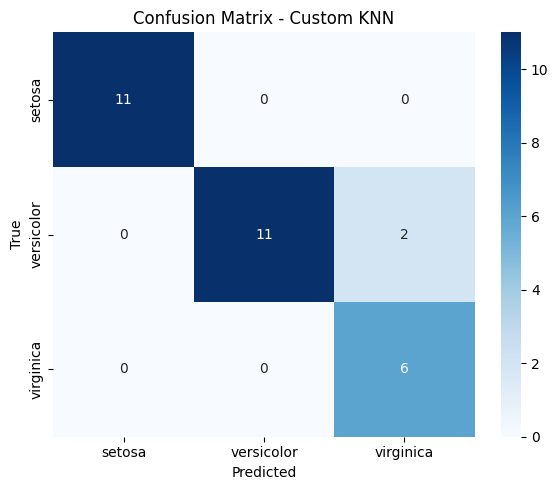

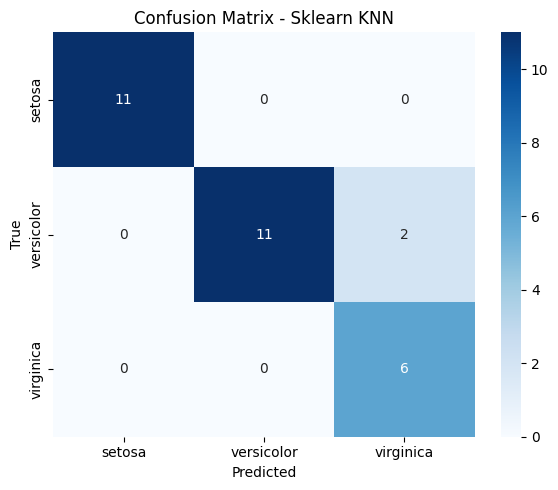

In [ ]:
plot_confusion_matrix(y_test, y_pred_custom, class_names=iris.target_names, model_name='Custom KNN')
plot_confusion_matrix(y_test, y_pred_sklearn, class_names=iris.target_names, model_name='Sklearn KNN')

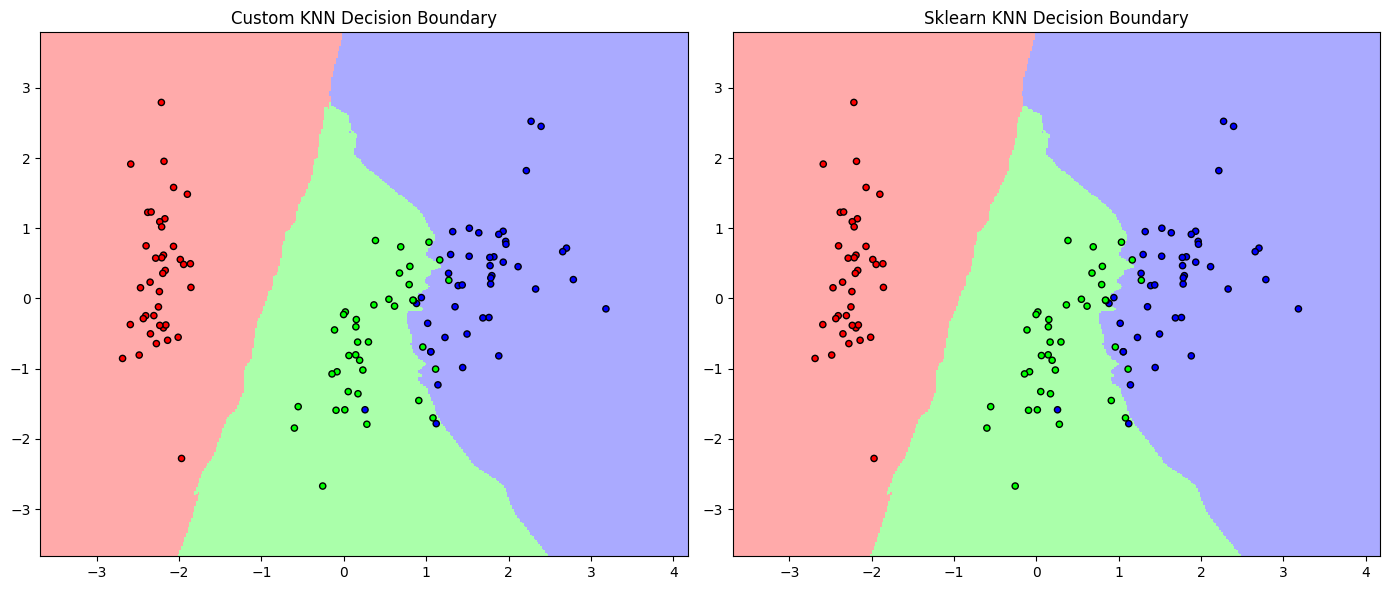

In [ ]:
plot_decision_boundary_comparison(X_train_pca, y_train, X_test_pca, y_test, KNN, knn_sklearn, k=15)